# Chapter 14:
    Keep the best models during training with checkpointing

In [1]:
# Checkpointing Neural Network Model Improvements
# Importing modules
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [2]:
!ls

 AMMI_Models.py
 baseline_model_plot.png
'Deep Learning with Keras using Tensorflow and Theano backend 2. Models..ipynb'
'Deep learning with Keras, using Tensorflow and Theano backend 3. Model checkpointing.ipynb'
'Deep Learning with Keras using Tensorflow and Theano backend, Python 1. Keras Structure..ipynb'
 iris.data
'Linear Algebra and Basics Mathematics..ipynb'
 model_plot.png
 Models
 Models_Boston_Data
 pima-indians-diabetes.data.csv
 __pycache__
 sonar.all-data
 Weights


In [7]:
# Load Pima indians dataset
data = np.loadtxt('pima-indians-diabetes.data', delimiter = ",")
# split data into X and Y variables
X = data[:,0:8]
Y = data[:,8]

In [8]:
# Create model
model = Sequential()
model.add(Dense(12, input_dim = 8, kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(8, kernel_initializer='uniform', activation= 'relu'))
model.add(Dense(1, kernel_initializer='uniform', activation= 'sigmoid'))
# compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
# Checkpointing all model improvements
filepath = "Weights/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [17]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.67717, saving model to Weights/weights-improvement-01-0.68.hdf5

Epoch 00002: val_accuracy did not improve from 0.67717

Epoch 00003: val_accuracy did not improve from 0.67717

Epoch 00004: val_accuracy improved from 0.67717 to 0.68110, saving model to Weights/weights-improvement-04-0.68.hdf5

Epoch 00005: val_accuracy did not improve from 0.68110

Epoch 00006: val_accuracy did not improve from 0.68110

Epoch 00007: val_accuracy improved from 0.68110 to 0.70079, saving model to Weights/weights-improvement-07-0.70.hdf5

Epoch 00008: val_accuracy did not improve from 0.70079

Epoch 00009: val_accuracy did not improve from 0.70079

Epoch 00010: val_accuracy did not improve from 0.70079

Epoch 00011: val_accuracy did not improve from 0.70079

Epoch 00012: val_accuracy did not improve from 0.70079

Epoch 00013: val_accuracy improved from 0.70079 to 0.70866, saving model to Weights/weights-improvement-13-0.71.hdf5

Epoch 00014: val_accuracy 


Epoch 00133: val_accuracy did not improve from 0.77953

Epoch 00134: val_accuracy did not improve from 0.77953

Epoch 00135: val_accuracy did not improve from 0.77953

Epoch 00136: val_accuracy did not improve from 0.77953

Epoch 00137: val_accuracy did not improve from 0.77953

Epoch 00138: val_accuracy did not improve from 0.77953

Epoch 00139: val_accuracy did not improve from 0.77953

Epoch 00140: val_accuracy did not improve from 0.77953

Epoch 00141: val_accuracy did not improve from 0.77953

Epoch 00142: val_accuracy improved from 0.77953 to 0.78346, saving model to Weights/weights-improvement-142-0.78.hdf5

Epoch 00143: val_accuracy did not improve from 0.78346

Epoch 00144: val_accuracy did not improve from 0.78346

Epoch 00145: val_accuracy did not improve from 0.78346

Epoch 00146: val_accuracy did not improve from 0.78346

Epoch 00147: val_accuracy did not improve from 0.78346

Epoch 00148: val_accuracy did not improve from 0.78346

Epoch 00149: val_accuracy did not improv

In [19]:
# Checkpoint only best model
filepath = "Weights/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [20]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.77165, saving model to Weights/weights.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.77165

Epoch 00003: val_accuracy improved from 0.77165 to 0.77559, saving model to Weights/weights.best.hdf5

Epoch 00004: val_accuracy did not improve from 0.77559

Epoch 00005: val_accuracy improved from 0.77559 to 0.78740, saving model to Weights/weights.best.hdf5

Epoch 00006: val_accuracy did not improve from 0.78740

Epoch 00007: val_accuracy did not improve from 0.78740

Epoch 00008: val_accuracy did not improve from 0.78740

Epoch 00009: val_accuracy did not improve from 0.78740

Epoch 00010: val_accuracy did not improve from 0.78740

Epoch 00011: val_accuracy did not improve from 0.78740

Epoch 00012: val_accuracy did not improve from 0.78740

Epoch 00013: val_accuracy did not improve from 0.78740

Epoch 00014: val_accuracy did not improve from 0.78740

Epoch 00015: val_accuracy did not improve from 0.78740

Epoch 00016: val_accu


Epoch 00145: val_accuracy did not improve from 0.79921

Epoch 00146: val_accuracy did not improve from 0.79921

Epoch 00147: val_accuracy did not improve from 0.79921

Epoch 00148: val_accuracy did not improve from 0.79921

Epoch 00149: val_accuracy did not improve from 0.79921

Epoch 00150: val_accuracy improved from 0.79921 to 0.80709, saving model to Weights/weights.best.hdf5


#### Reuse the saved weights 

In [21]:
# create model to take weights since we did not save the model, we only saved the weights.
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation ='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation ='sigmoid'))
# Load the saved weights
model.load_weights('Weights/weights.best.hdf5')
# Compile the model (required to make predictions)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print('Created model and loaded weights from file')

Created model and loaded weights from file


In [22]:
# Bring in data to evaluate model
# Estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose = 0)
print('%s: %.2f%%' %(model.metrics_names[1], scores[1]*100))

accuracy: 79.17%


# Chapter 15:
    Understand Model Behavior during training by plotting history.

In [23]:
# Import modules
# Set seed
# Load Data
# Split data

# Create model
model = Sequential()
model.add(Dense(16, input_dim = 8, kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(8, kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [29]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs = 500, batch_size=5, verbose=0)
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


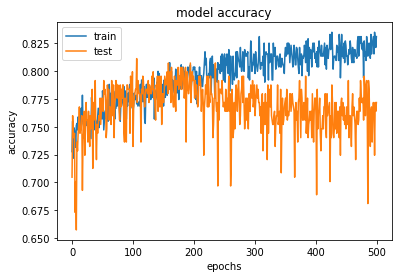

In [30]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

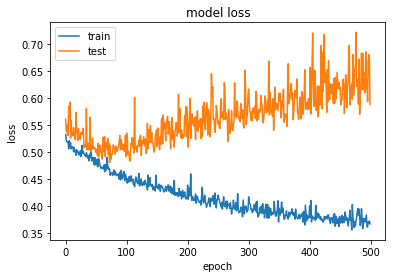

In [31]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

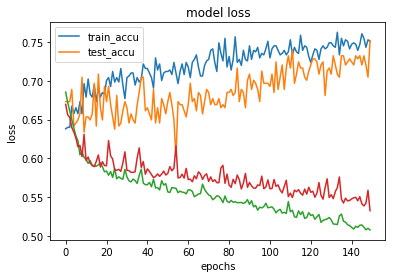

In [28]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
#plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train_accu', 'test_accu'], loc = 'upper left')
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
# plt.show()